# YAAD

In [1]:
import yaad

In [2]:
a = yaad.Variable(2, requires_grad=True, name="a")
b = yaad.Variable(5, requires_grad=True, name="b")
c = a+b; c.retain_grad()
d = yaad.sigmoid(c); d.retain_grad()
e = yaad.exp(d); e.retain_grad()

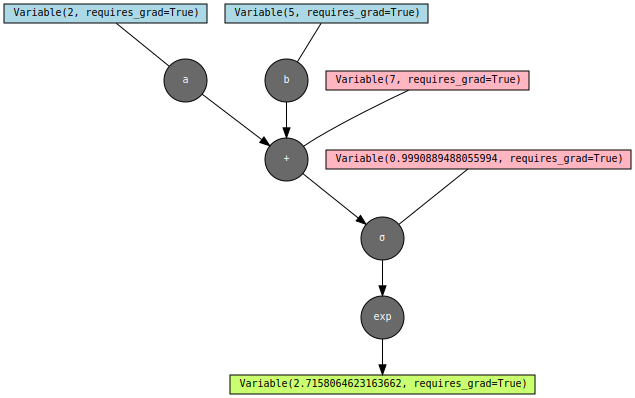

In [3]:
yaad.dot.make_dot(e,show_grads=True,show_intermediate_outs=True)

In [4]:
d.backward()

In [5]:
c.grad

Variable(0.000910221180121784)

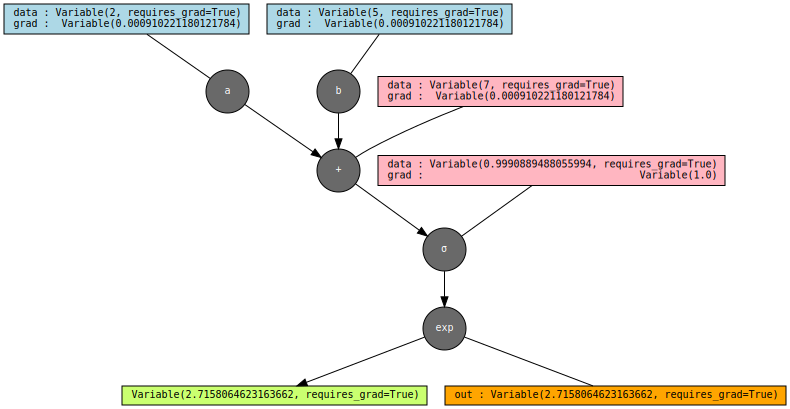

In [6]:
yaad.dot.make_dot(e,show_grads=True,show_intermediate_outs=True,show_saved=True)

In [8]:
c.grad

Variable(-0.0024719845631119702)

In [7]:
d.grad

Variable(2.7158064623163662)

In [6]:
e.grad

Variable(1.0)

# Pytorch

In [9]:
import torch

In [10]:
a = torch.tensor(2., requires_grad=True)

In [11]:
b = torch.tensor(5., requires_grad=True)

In [12]:
c = a+b;c.retain_grad()
d = torch.sigmoid(c);d.retain_grad()
e = torch.exp(d);e.retain_grad()

In [20]:
d

tensor(0.9991, grad_fn=<SigmoidBackward0>)

In [17]:
c.grad

tensor(0.0025)

In [18]:
d.grad

tensor(2.7158)

In [19]:
e.grad

tensor(1.)

In [16]:
e.backward()

In [21]:
2.7 * 0.9991 * (1- 0.9991)

0.002427813000000032

In [13]:
a.grad

tensor(0.0025)

In [14]:
b.grad

tensor(0.0025)

In [121]:
a = torch.randn(1,requires_grad = True)

In [122]:
b = torch.clone(a)

In [123]:
c = b**3

In [124]:
b

tensor([0.0213], grad_fn=<CloneBackward0>)

In [125]:
a

tensor([0.0213], requires_grad=True)

In [126]:
c

tensor([9.6438e-06], grad_fn=<PowBackward0>)

In [ ]:
torch.autograd.backward

In [127]:
grad = torch.autograd.grad(c,[a,b],create_graph=True)

In [128]:
grad

(tensor([0.0014], grad_fn=<MulBackward0>),
 tensor([0.0014], grad_fn=<MulBackward0>))

In [129]:
grad2 = torch.autograd.grad(grad[0], [a,b], allow_unused=True,)

In [130]:
grad2

(tensor([0.1277]), tensor([0.1277]))

In [110]:
grad2

(tensor([14.0238]),)

In [17]:
b is grad[0].grad_fn.next_functions[1][0].variable

True

In [71]:
grad2

(tensor([1.]),)

In [19]:
a

tensor([0.7873], requires_grad=True)

In [12]:
b = a + 2

In [13]:
c = 2*b

In [14]:
# c = 2*a + 4

In [15]:
d = c.mean()

In [16]:
d.backward(create_graph=True)

/usr/local/lib/python3.8/dist-packages/torch/autograd/__init__.py:173: UserWarning: Using backward() with create_graph=True will create a reference cycle between the parameter and its gradient which can cause a memory leak. We recommend using autograd.grad when creating the graph to avoid this. If you have to use this function, make sure to reset the .grad fields of your parameters to None after use to break the cycle and avoid the leak. (Triggered internally at  ../torch/csrc/autograd/engine.cpp:995.)
  Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass


In [22]:
a.grad

tensor([1., 1.])

In [ ]:
torch.auto